# 回帰直線

01. <u>**実験データの回帰直線**</u>

    - `状況　:　大腸菌などの新たな殺菌装置として紫外線ランプの開発を行なっている`
    
        - **データ分析の目的**
            - *紫外線ランプに投入する電力量に応じて大腸菌の殺菌効率がどのように変化するかを調べる*
        
        - **保有している実験データ**
            - *紫外線ランプを10-180[w]まで変化させ、60[s]間紫外線を照射した時の大腸菌の生存率*


In [11]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('./resources/linear_approximation.xlsx', header=6, index_col=0, sheet_name='Sheet1')
df.head()

,Number
Time[s],
0,98433.561371
10,94203.487920
20,91517.336375
30,86539.457397
40,81777.430583


In [5]:
watt_arr = np.array([0, 10, 20, 40, 60, 80])
df_all = pd.DataFrame()
for i in range(1, 6):
    df = pd.read_excel('./resources/linear_approximation.xlsx', header=6, index_col=0, sheet_name='Sheet'+str(i))
    df['W'] = watt_arr[i]
    df_all = pd.concat([df_all, df])

In [6]:
df_all

,Number,W
Time[s],,
0,98433.561371,10
10,94203.487920,10
20,91517.336375,10
30,86539.457397,10
40,81777.430583,10
50,76858.586685,10
60,73447.031317,10
0,99029.902000,20
10,91712.170320,20


In [7]:
# groupby で分析を行う
groups = df_all.groupby('W')
df_10W = groups.get_group(10)
df_10W

,Number,W
Time[s],,
0,98433.561371,10
10,94203.487920,10
20,91517.336375,10
30,86539.457397,10
40,81777.430583,10
50,76858.586685,10
60,73447.031317,10


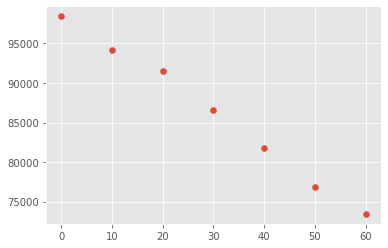

In [12]:
plt.scatter(df_10W.index, df_10W['Number'])